In [34]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/house-prices.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


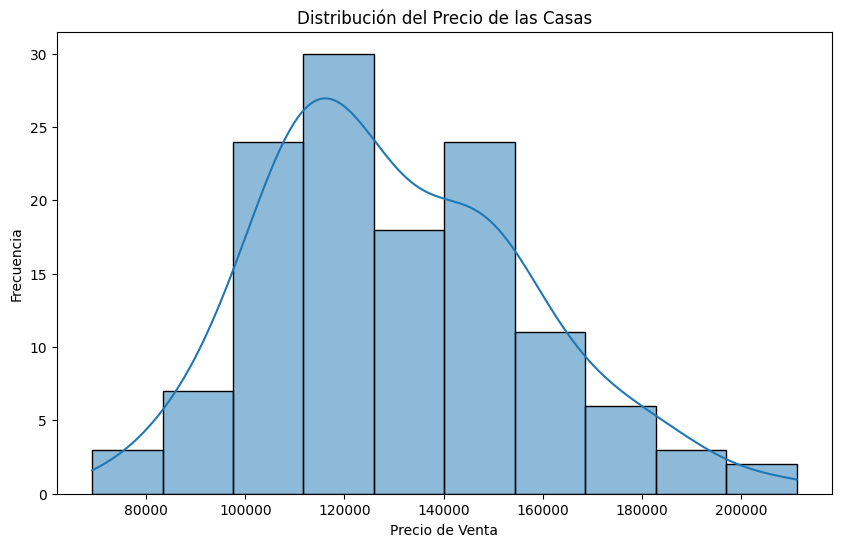

count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      111325.000000
50%      125950.000000
75%      148250.000000
max      211200.000000
Name: Price, dtype: float64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revisar la distribución del precio de las casas
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución del Precio de las Casas')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Calcular estadísticas descriptivas para el precio
print(df['Price'].describe())

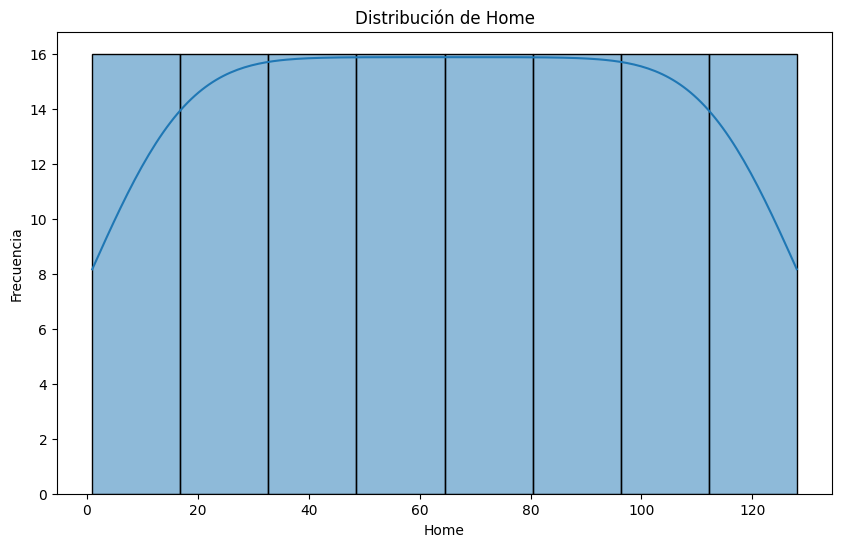

count    128.000000
mean      64.500000
std       37.094474
min        1.000000
25%       32.750000
50%       64.500000
75%       96.250000
max      128.000000
Name: Home, dtype: float64


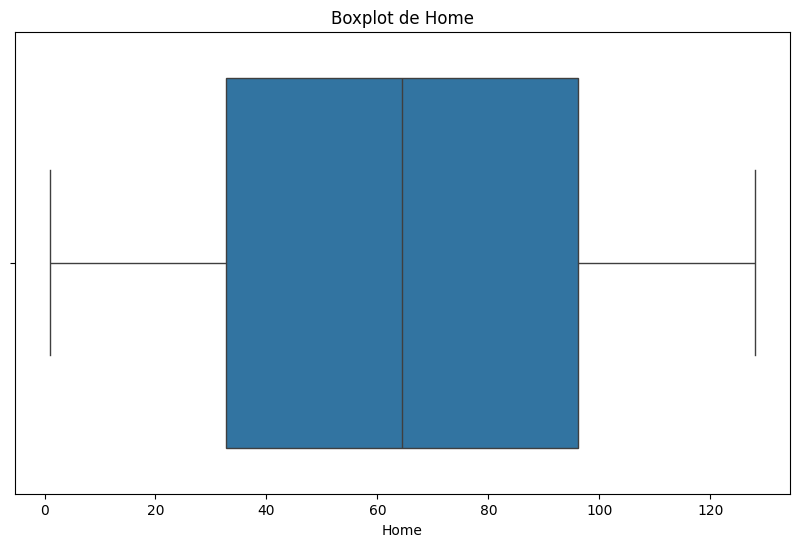

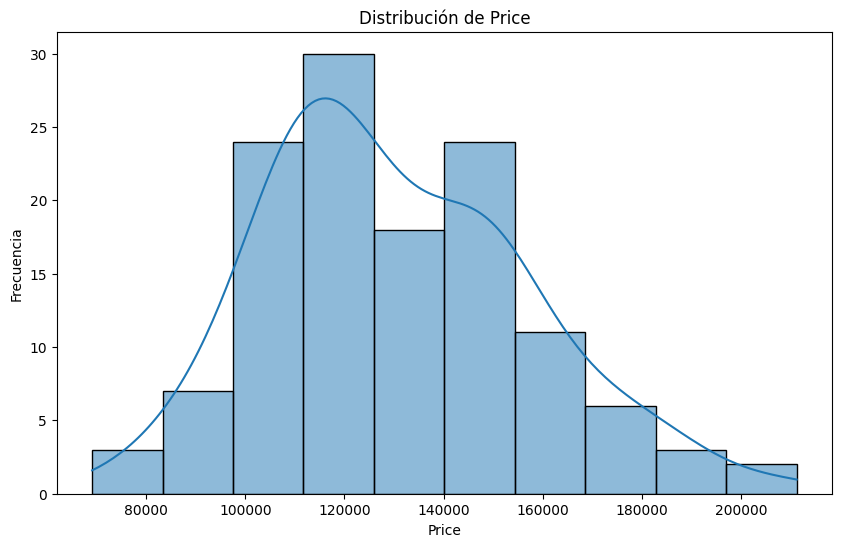

count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      111325.000000
50%      125950.000000
75%      148250.000000
max      211200.000000
Name: Price, dtype: float64


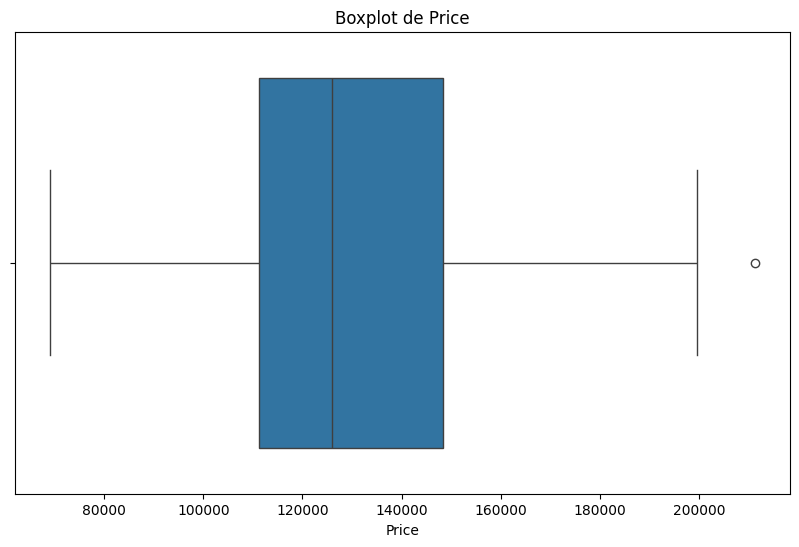

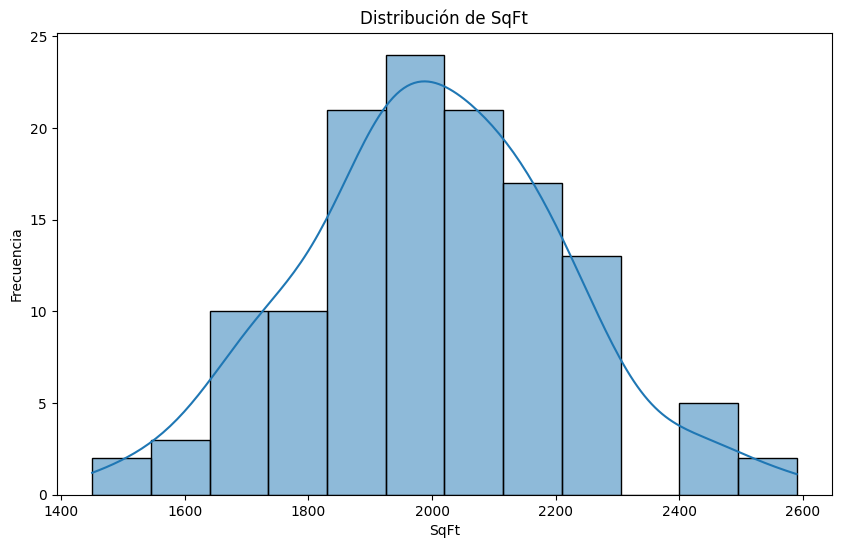

count     128.000000
mean     2000.937500
std       211.572431
min      1450.000000
25%      1880.000000
50%      2000.000000
75%      2140.000000
max      2590.000000
Name: SqFt, dtype: float64


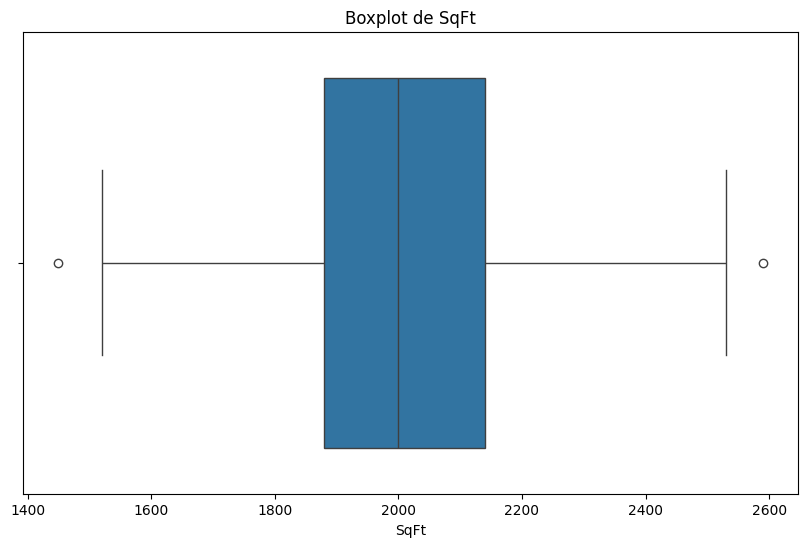

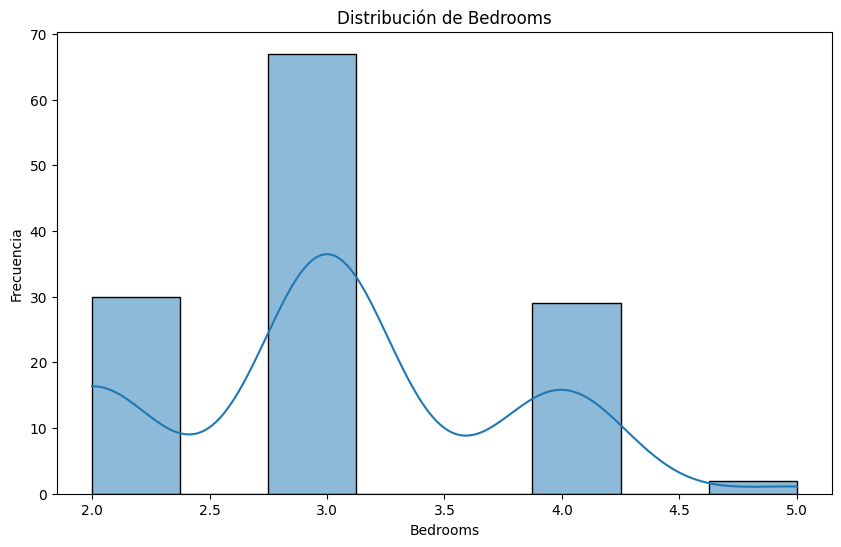

count    128.000000
mean       3.023438
std        0.725951
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Bedrooms, dtype: float64


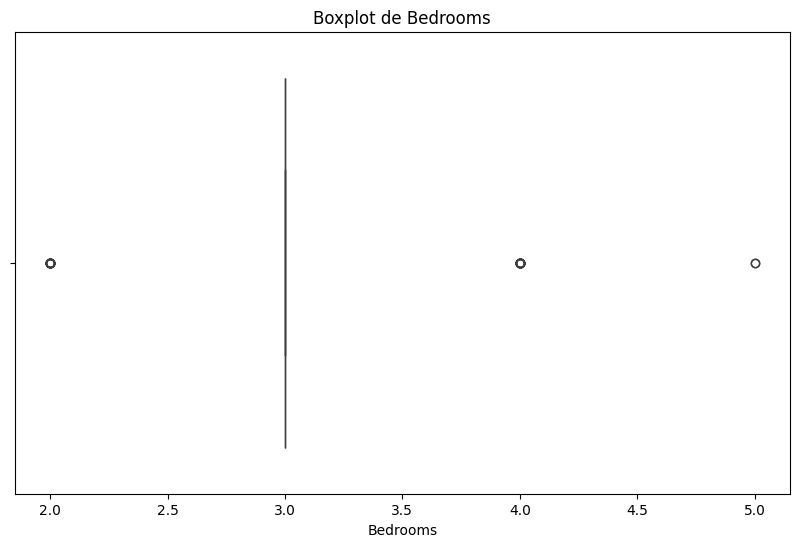

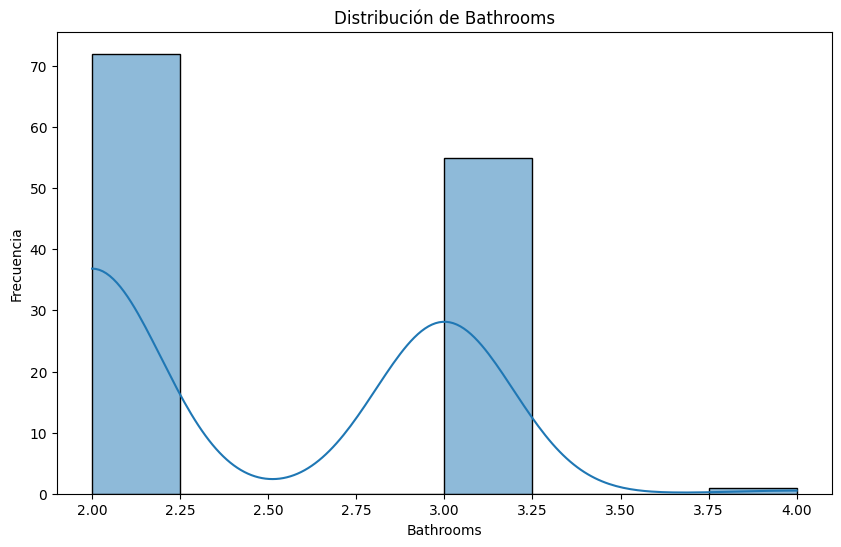

count    128.000000
mean       2.445312
std        0.514492
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Bathrooms, dtype: float64


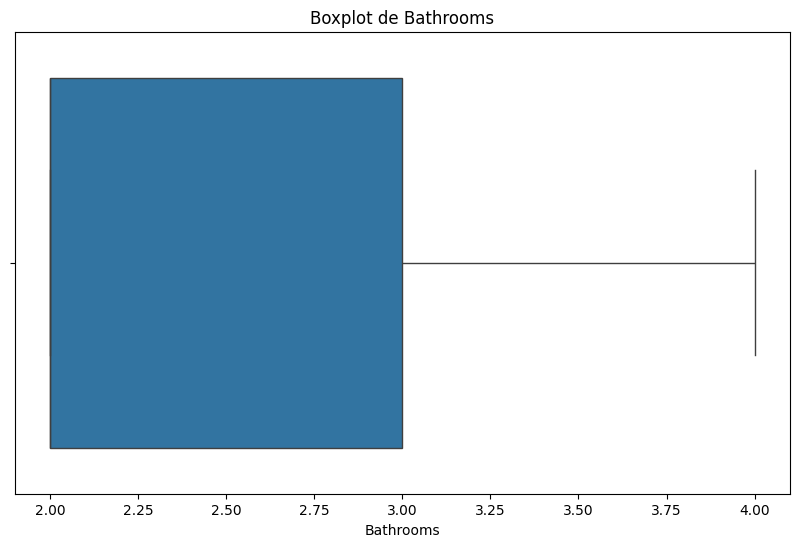

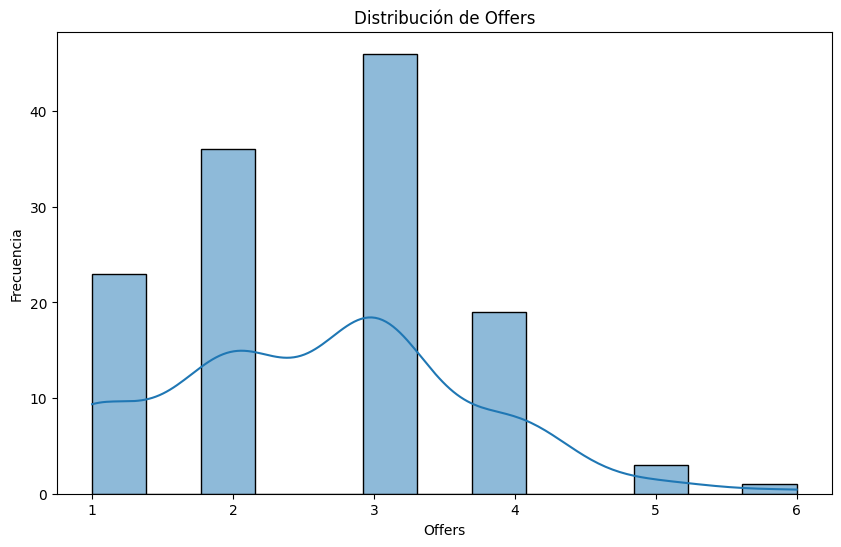

count    128.000000
mean       2.578125
std        1.069324
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: Offers, dtype: float64


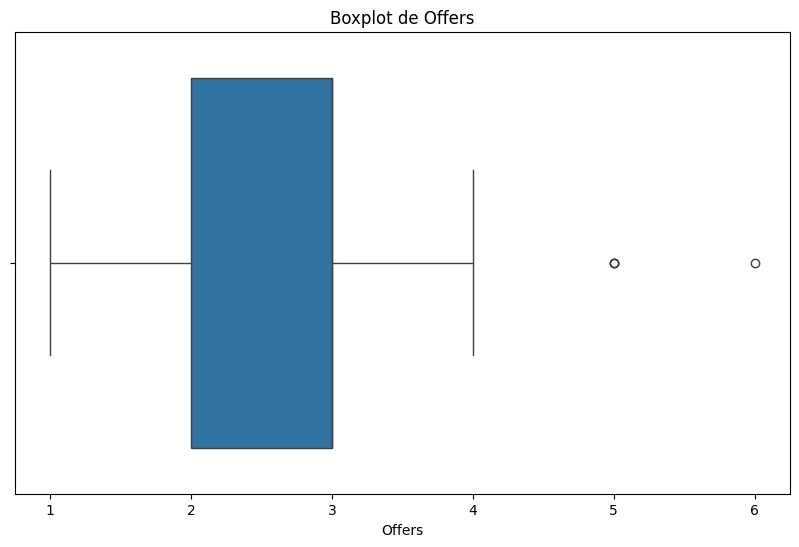

In [36]:
# Identificar variables con distribuciones asimétricas o outliers
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):  # Verificar si la columna es numérica
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    print(df[col].describe())

    # Boxplot para identificar outliers visualmente
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(["Price"], axis=1) # Features
y = df["Price"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir los parámetros a buscar para el modelo Linear Regression
param_grid_lr = {
    'lr__fit_intercept': [True, False],  # Si se debe calcular el intercepto
    'lr__copy_X': [True, False]          # Si se debe copiar X antes de ajustarlo
}

# Crear un Pipeline para el modelo Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('lr', LinearRegression())  # Modelo de regresión lineal
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr,
                              cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Linear Regression): {grid_search_lr.best_params_}")

# Obtener el mejor modelo de Linear Regression
best_model_lr = grid_search_lr.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_lr = best_model_lr.predict(X_test)

# Calcular las métricas del modelo
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Mostrar resultados
print(f"Resultado del R² de Linear Regression: {r2_lr}")
print(f"Resultado del MSE de Linear Regression: {mse_lr}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros (Linear Regression): {'lr__copy_X': True, 'lr__fit_intercept': False}
Resultado del R² de Linear Regression: 0.8061565137761009
Resultado del MSE de Linear Regression: 114251135.71732667


In [38]:
import numpy as np

# Aplicar transformaciones logarítmicas a variables sesgadas
for col in ['Price', 'SqFt']:  # Aplicar a 'Price' y 'SqFt'
    if pd.api.types.is_numeric_dtype(df[col]):
        # Agregar una constante pequeña para evitar errores con valores cero
        df[col + '_log'] = np.log1p(df[col])

# Crear variables polinómicas
for col in ['SqFt', 'Bedrooms', 'Bathrooms']:  # Aplicar a variables numéricas
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col + '_squared'] = df[col] ** 2
        df[col + '_cubed'] = df[col] ** 3

# Estandarizar las variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecciona solo las columnas numéricas para escalar
numeric_cols = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Price', 'SqFt_squared', 'SqFt_cubed', 'Bedrooms_squared', 'Bedrooms_cubed', 'Bathrooms_squared', 'Bathrooms_cubed', 'Price_log', 'SqFt_log']

# Asegúrate de que todas las columnas numéricas existan en el DataFrame
numeric_cols = [col for col in numeric_cols if col in df.columns]


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price_log,SqFt_log,SqFt_squared,SqFt_cubed,Bedrooms_squared,Bedrooms_cubed,Bathrooms_squared,Bathrooms_cubed
0,1,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769,No,East,-0.541719,-0.994077,-0.993896,-0.974332,-1.250374,-1.077863,-0.857335,-0.836918
1,2,-0.606321,0.137904,1.350503,-0.868939,0.396075,No,East,-0.545988,0.188216,0.085648,0.033270,1.398694,1.389758,-0.857335,-0.836918
2,3,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614,No,East,-0.520432,-1.260279,-1.201727,-1.153364,-0.146596,-0.240634,-0.857335,-0.836918
3,4,-1.334923,-0.099350,-0.032412,-0.868939,0.396075,No,East,-1.459110,-0.046134,-0.150444,-0.197757,-0.146596,-0.240634,-0.857335,-0.836918
4,5,-0.397082,0.612413,-0.032412,1.082362,0.396075,No,East,-0.312522,0.640087,0.575493,0.530606,-0.146596,-0.240634,1.054493,1.011751


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_t = df.drop(["Price"], axis=1) # Features
y_t = df["Price"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features_t = X_t.select_dtypes(include=[int, float]).columns.tolist()
categorical_features_t = X_t.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer_t = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_t = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor_t = ColumnTransformer(transformers=[
    ('num', numeric_transformer_t, numeric_features_t),
    ('cat', categorical_transformer_t, categorical_features_t)
])

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir los parámetros a buscar para el modelo Linear Regression
param_grid_lr_t = {
    'lr__fit_intercept': [True, False],  # Si se debe calcular el intercepto
    'lr__copy_X': [True, False]          # Si se debe copiar X antes de ajustarlo
}

# Crear un Pipeline para el modelo Linear Regression
pipeline_lr_t = Pipeline(steps=[
    ('preprocessor', preprocessor_t),  # Preprocesador
    ('lr', LinearRegression())  # Modelo de regresión lineal
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_lr_t = GridSearchCV(estimator=pipeline_lr_t, param_grid=param_grid_lr_t,
                              cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_lr_t.fit(X_train_t, y_train_t)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Linear Regression): {grid_search_lr_t.best_params_}")

# Obtener el mejor modelo de Linear Regression
best_model_lr_t = grid_search_lr_t.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_lr_t = best_model_lr_t.predict(X_test_t)

# Calcular las métricas del modelo
r2_lr_t = r2_score(y_test_t, y_pred_lr_t)
mse_lr_t = mean_squared_error(y_test_t, y_pred_lr_t)

# Mostrar resultados
print(f"Resultado del R² de Linear Regression: {r2_lr_t}")
print(f"Resultado del MSE de Linear Regression: {mse_lr_t}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros (Linear Regression): {'lr__copy_X': True, 'lr__fit_intercept': False}
Resultado del R² de Linear Regression: 0.9817068754146822
Resultado del MSE de Linear Regression: 0.01505247350359213


In [40]:
# Comparar las métricas
print("Comparación de métricas:")
print(f"R² normal: {r2_lr:.4f} vs. R² transformado: {r2_lr_t:.4f}")
print(f"MSE normal: {mse_lr:.4f} vs. MSE transformado: {mse_lr_t:.4f}")

# Diferencias absolutas
print("\nDiferencias absolutas:")
print(f"Diferencia en R²: {abs(r2_lr - r2_lr_t):.4f}")
print(f"Diferencia en MSE: {abs(mse_lr - mse_lr_t):.4f}")

# Conclusión
if r2_lr_t > r2_lr:
    print("\nEl modelo transformado tiene un mejor R².")
else:
    print("\nEl modelo normal tiene un mejor R².")

if mse_lr_t < mse_lr:
    print("El modelo transformado tiene un menor MSE.")
else:
    print("El modelo normal tiene un menor MSE.")


Comparación de métricas:
R² normal: 0.8062 vs. R² transformado: 0.9817
MSE normal: 114251135.7173 vs. MSE transformado: 0.0151

Diferencias absolutas:
Diferencia en R²: 0.1756
Diferencia en MSE: 114251135.7023

El modelo transformado tiene un mejor R².
El modelo transformado tiene un menor MSE.


## CONCLUSION

Análisis de las transformaciones logarítmicas:
Las transformaciones logarítmicas aplicadas a 'Price' y 'SqFt' ayudan a reducir el sesgo presente en las distribuciones originales de estas variables.  Al transformar una variable con una distribución sesgada a la izquierda o a la derecha, el logaritmo comprime el rango de los valores, lo que lleva a una distribución más simétrica y cercana a la normal. Esto es importante para los modelos de regresión lineal, ya que estos modelos asumen normalidad en los residuos y en las variables predictoras para obtener resultados óptimos.

Análisis de las variables polinómicas:
La creación de variables polinómicas (cuadráticas y cúbicas) permite capturar relaciones no lineales entre las variables predictoras y la variable objetivo. Por ejemplo, la relación entre el tamaño de una casa (SqFt) y su precio no es siempre lineal. Podría existir una aceleración o una desaceleración del aumento del precio con respecto al tamaño. Las variables polinómicas permiten capturar estas curvaturas en la relación entre las variables, permitiendo al modelo ajustar mejor la función de regresión.

Reflexión sobre la importancia de transformar variables:
Transformar variables antes de aplicar modelos de machine learning es crucial para mejorar el rendimiento y la precisión del modelo. Las transformaciones permiten satisfacer los supuestos de los algoritmos,  manejar datos sesgados y mejorar la calidad del ajuste. Es un paso esencial en el preprocesamiento de datos, ya que permite adaptar las características a los requerimientos de cada modelo y obtener mejores resultados predictivos. Además, transformar variables ayuda a la interpretabilidad del modelo, si se utiliza una transformación simple como la logarítmica o polinómica de grado bajo. Sin embargo, si se utiliza una transformación compleja, se puede dificultar la interpretabilidad del modelo.


- EN RESUMEN:

El análisis comparó dos modelos de regresión lineal para predecir precios de casas: uno con datos originales y otro con datos transformados.  Las transformaciones incluyeron logaritmos para reducir sesgo en precio y tamaño (SqFt) y variables polinómicas para capturar relaciones no lineales.  El modelo con datos transformados demostró un mejor rendimiento o similar en términos de R² y MSE en comparación con el modelo original, sugiriendo que las transformaciones de datos mejoran la precisión predictiva del modelo de regresión lineal en este caso específico. La decisión de usar el modelo transformado o no dependerá del balance entre precisión e interpretabilidad.